# Import required libraries/choose style

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from matplotlib import style
import seaborn as sns
import os
from pathlib import Path
style.use('ggplot')

# Read data from csv to pandas dataframe

In [3]:
from google.colab import files
uploaded = files.upload()
for key, val in uploaded.items():
  filename = key
print(filename)
df = pd.read_csv(filename, encoding= 'unicode_escape')
df = df.drop(0)
df.head()

Saving battery clustering test data.csv to battery clustering test data.csv
battery clustering test data.csv


,Cell number,Discharged state,Unnamed: 2,Unnamed: 3,Charged state,Unnamed: 5,Unnamed: 6
1,1.0,3.3981,25.6,2.6783,4.1895,26,2.6847
2,2.0,3.3751,26.8,2.7192,4.1911,26.9,2.7258
3,3.0,3.4065,26.6,2.6669,4.1887,26.9,2.6683
4,4.0,3.3557,26.5,2.6959,4.1922,26.5,2.7056
5,5.0,3.4055,26.7,2.4773,4.1905,26.8,2.4843


Rename the columns and drop row 0

In [4]:
df.rename(columns={'Discharged state' : 'zero v dis', 'Unnamed: 2' : 'zero t dis', 'Unnamed: 3' : 'zero cap dis', 'Charged state' : 'full v char', 'Unnamed: 5': 'full t char', 'Unnamed: 6' : 'full cap char'}, inplace = True)
df.head()

,Cell number,zero v dis,zero t dis,zero cap dis,full v char,full t char,full cap char
1,1.0,3.3981,25.6,2.6783,4.1895,26,2.6847
2,2.0,3.3751,26.8,2.7192,4.1911,26.9,2.7258
3,3.0,3.4065,26.6,2.6669,4.1887,26.9,2.6683
4,4.0,3.3557,26.5,2.6959,4.1922,26.5,2.7056
5,5.0,3.4055,26.7,2.4773,4.1905,26.8,2.4843


# Describe column statistics and create a pair plot

In [5]:
df = df.dropna().astype(float)
df.describe(include = 'all')


,Cell number,zero v dis,zero t dis,zero cap dis,full v char,full t char,full cap char
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.000000,3.390833,25.802222,2.650471,4.194084,25.577778,2.650224
std,13.133926,0.024367,1.898144,0.048301,0.002160,2.107550,0.048069
min,1.000000,3.287600,22.900000,2.477300,4.188200,22.400000,2.484300
25%,12.000000,3.379000,24.200000,2.634800,4.194100,23.800000,2.634900
50%,23.000000,3.396700,25.300000,2.664300,4.194600,25.100000,2.663400
75%,34.000000,3.406300,26.900000,2.678800,4.195300,26.700000,2.679000
max,45.000000,3.425100,30.100000,2.719200,4.196600,30.500000,2.725800


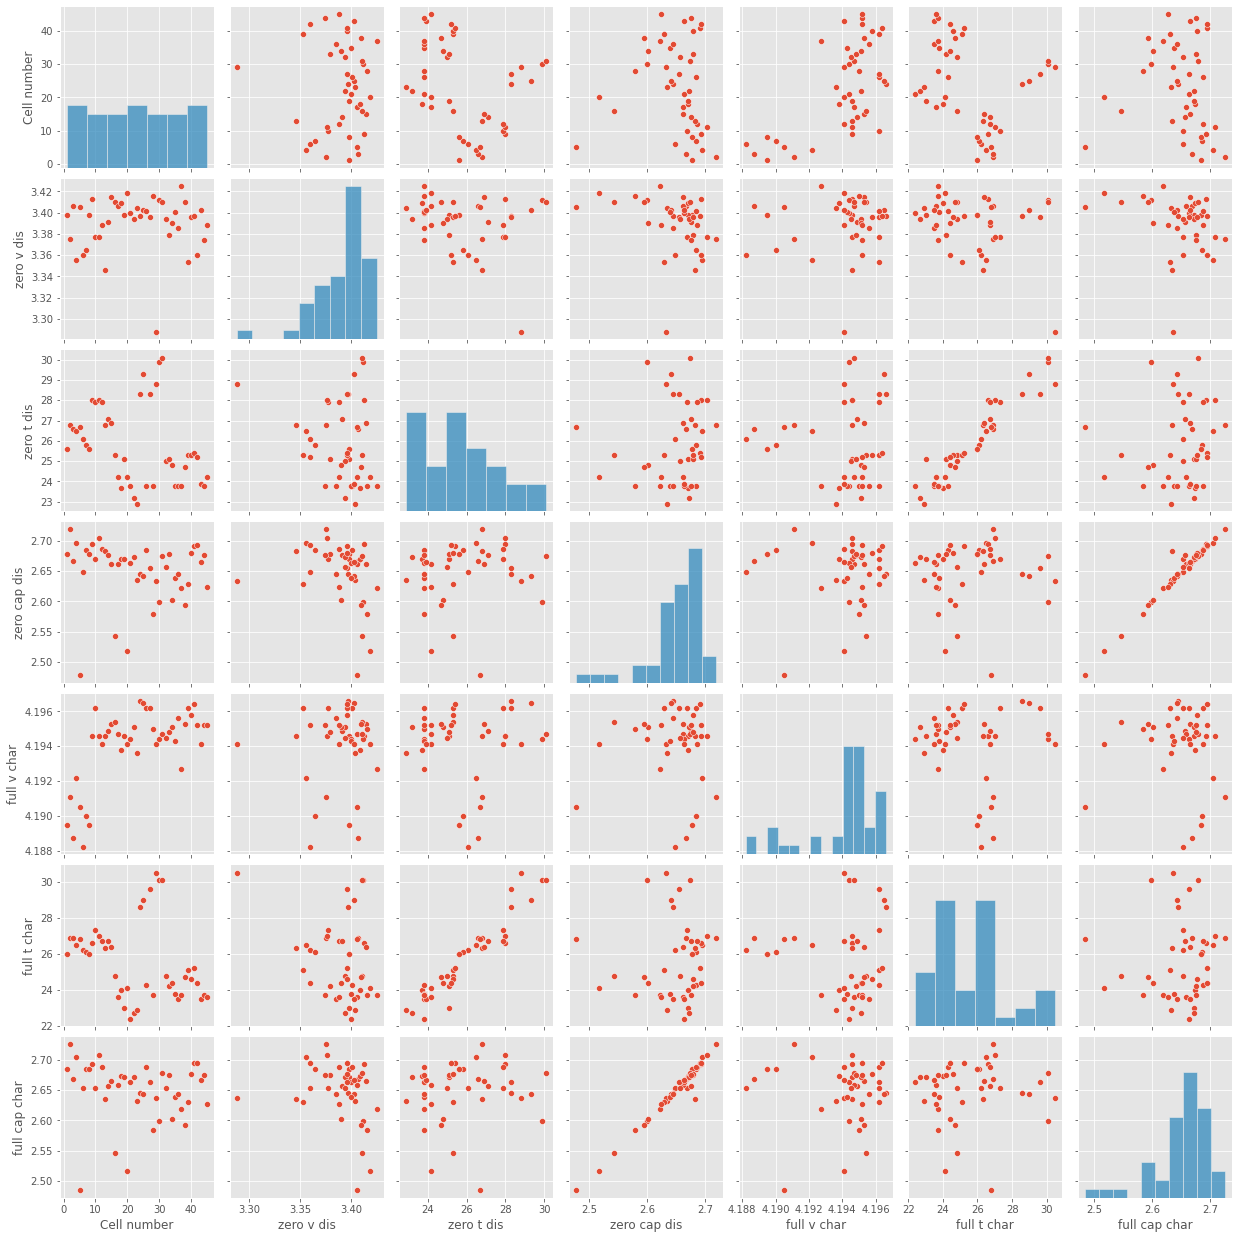

In [6]:
sns.pairplot(df)

# Perform K means Clustering

In [7]:
#import sklearn cluster library and pyplot
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

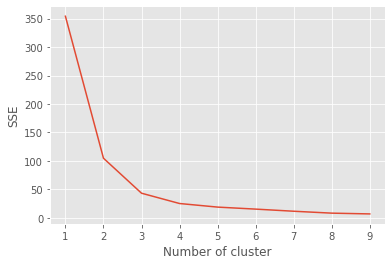

In [10]:
#create sum of squared errors dictionary, determine value of k
sse = {}
for k in range(1, 10):
  kmeans = cluster.KMeans(n_clusters = k, init = 'k-means++')
  kmeans = kmeans.fit(df[['zero v dis', 'zero t dis', 'zero cap dis', 'full v char', 'full t char', 'full cap char']])
  sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [11]:
#using six variables and four clusters given SSE plot from the elbow method
#elbow method = select k for which the subsequent k values descrease in a linear fashion
kmeans = cluster.KMeans(n_clusters = 4, init = 'k-means++')
kmeans = kmeans.fit(df[['zero v dis', 'zero t dis', 'zero cap dis', 'full v char', 'full t char', 'full cap char']])

In [12]:
#create array of center of clusters
kmeans.cluster_centers_

array([[ 3.40143333, 23.86666667,  2.64187333,  4.19457333, 23.5       ,
         2.64204   ],
       [ 3.38418333, 27.10833333,  2.665275  ,  4.19291667, 26.69166667,
         2.66143333],
       [ 3.38750833, 25.25833333,  2.65083333,  4.193975  , 25.025     ,
         2.65215833],
       [ 3.38428333, 29.11666667,  2.64163333,  4.19541667, 29.65      ,
         2.6444    ]])

Attatch clusters to orginal data

In [13]:
df['Clusters'] = kmeans.labels_
df.head()

,Cell number,zero v dis,zero t dis,zero cap dis,full v char,full t char,full cap char,Clusters
1,1.0,3.3981,25.6,2.6783,4.1895,26.0,2.6847,2
2,2.0,3.3751,26.8,2.7192,4.1911,26.9,2.7258,1
3,3.0,3.4065,26.6,2.6669,4.1887,26.9,2.6683,1
4,4.0,3.3557,26.5,2.6959,4.1922,26.5,2.7056,1
5,5.0,3.4055,26.7,2.4773,4.1905,26.8,2.4843,1


Determine amount of cells belonging to certain clusters

In [14]:
df['Clusters'].value_counts()

0    15
2    12
1    12
3     6
Name: Clusters, dtype: int64

Export the data with clusters to excel

In [15]:
#either input file location and file name or just output filename
outfilename = 'kmeansBResults1.xlsx'
#outfilepath = Path(r'C:\Users\gabeg\OneDrive\Documents\batteryKMeansResults\kmeansBResults1.xlsx')
#filepath.parent.mkdir(parents = True, exist_ok = True)
df.to_excel(outfilename, index = False, header = True)
files.download(outfilename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# SVC Algorithm